# Introducción

El mercado de los smartphones es uno de los más competidos del mundo y se espera que crezca más en los siguientes años debido al avance en tecnologías como la Inteligencia Artificial y el 5G.

Es de vital importancia para los fabricantes y vendedores de estos dispositivos el categoriar adecuadamente sus productos, ya sean de gama baja, media o alta.

Según Barry Schwartz en la que llama "La paradoja de la elección" la percepción de los productos afecta en la decisión final del consumidor, por lo que el reducir sus opciones es vital para garantizar mayores probabilidades de una venta y evitar la llamada "parálisis de compra".

Agrupando los productos en diferentes categorías puede facilitarle bastante la elección al cliente, incrementando las probabilidad de garantizar la venta. En el caso de los smartphones, una categorización popular es agruparlos en rangos de precios (gamas baja, media y alta), lo que se pretende hacer a continuación.

El algoritmo de categorización K-means es capaz de agrupar productos según sus propiedades. Esto se hace generando puntos al azar y midiendo la distancia euclidiana de esos puntos a las propiedades de cada elemento, mediante una iteración, se consigue llegar al mejor resultado posible.

# Data

Para este proyecto se utilizará la base de datos llamada "Mobile Price Classification" de Abhishek Sharma (https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv), la cual contiene datos de 2000 celulares, incluyendo propiedades como el poder de la batería, el tamaño de la pantalla, la resolución, memoria interna, RAM, calidad de la cámara, etc.

En el caso de este proyecto, solo se utilizaran tres propiedades: memoria RAM, memoria interna y alto de la pantalla. Esto por motivos de visualización, ya que al tener más de 3 propiedades se hace imposible observar las nubes de puntos en el espacio.

Es necesario mencionar que se seleccionaron de la base de datos solamente los dispositivos considerados smartphones (ya que esta contenía todo tipo de celulares), así que estos cumplen las características de tener acceso a internet, bluetooth y contar con una pantalla touch.

# Metodología

El primer paso es importar las librerñias a utilizar, en este caso son Numpy (la cual servirá para el manejo de arreglos), Scikit-Learn (la cual ayudará a definir el algoritmo de K-Means), Pandas (para poder leer los datos del archivo .csv) y Matplotlib (para permitir la visualización de datos).

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

Posteriormente, se leen los datos del archivo .csv.

In [4]:
df = pd.read_csv('smartphones.csv')

Luego, se seleccionan las columnas a utilizar.

In [7]:
X = df[['ram', 'int_memory', 'sc_h']]

Y se muestran los datos.

In [8]:
X

,ram,int_memory,sc_h
0,3826,33,14
1,2337,19,11
2,2782,57,18
3,508,33,5
4,2227,41,18
...,...,...,...
243,1620,57,9
244,1180,21,6
245,3962,18,15
246,2032,39,11


En esta sección, los datos que se encuentran en un dataframe se copian a un arreglo de Numpy para poder manejarlos de una manera más fácil y eficiente.

In [9]:
X_b = np.c_[X]

Ahora, por medio de Matplotlib es posible observar cada uno de los dispositivos en el espacio, según sus propiedades de RAM, memoria interna y altura de la pantalla.

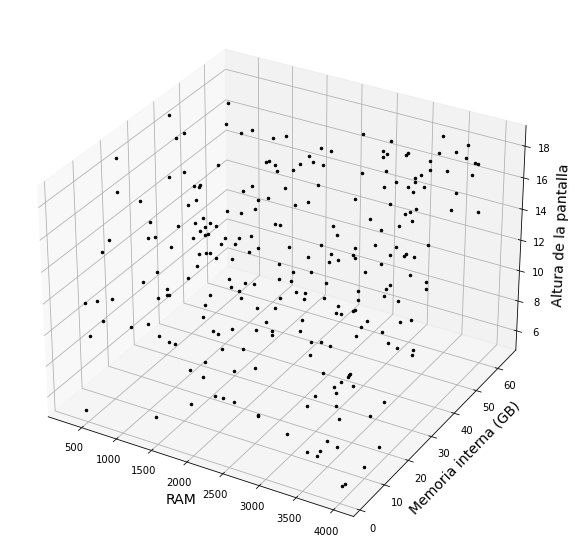

In [11]:
fig3d = plt.figure(figsize = (20, 10)).add_subplot(projection='3d')
fig3d.plot(X_b[:, 0], X_b[:,1], X_b[:,2],   'k.', markersize=5)
fig3d.set_xlabel('RAM', fontsize=14)
fig3d.set_ylabel('Memoria interna (GB)', fontsize=14)
fig3d.set_zlabel('Altura de la pantalla', fontsize=14)
plt.show()

Posteriormente, se procede a aplicar el algoritmo K-Means. Mediante un arreglo se producen varias clasificaciones según el número de "nubes" que se le indiquen (1 a 10); esto con el objetivo de determinar por medio de las inercias el número óptimo de clusters para nuestro set de datos.

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_b)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Christian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualizando la relación entre las inercias y los clusters (k), observamos que el "codo" (el número óptimo de clusters) se encuentra entre el 2 y el 3. Para adherirnos a nuestro objetivo de clasificar los smartphones en gamas baja, media y alta escogemos el 3.

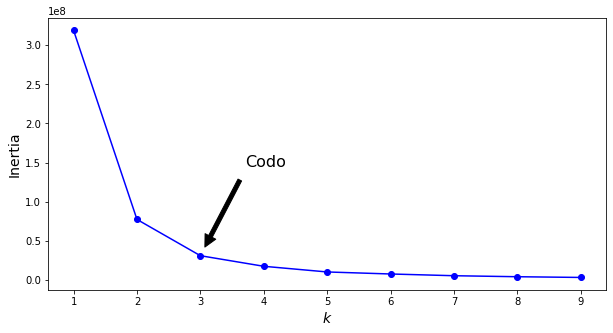

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Codo',
             xy=(3, inertias[2]),
             xytext=(0.40, 0.50),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

De esta manera, ya podemos clasificar los teléfonos inteligentes en 3 diferentes grupos.

In [17]:
k=3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_b)

La clasificación es la siguiente:

In [18]:
y_pred

array([0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0,
       1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2,
       0, 2, 1, 0, 2, 0])

Los centros de los clusters se ubican en las siguientes coordenadas:

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[3411.1010101    34.23232323   12.85858586]
 [ 796.79166667   32.59722222   12.31944444]
 [2065.28571429   31.7012987    12.15584416]]


Ahora, es posible visualizar dónde se encuentran los centros de los clusters. Los smartphones se clasifican de acuerdo al centroide más cercano.

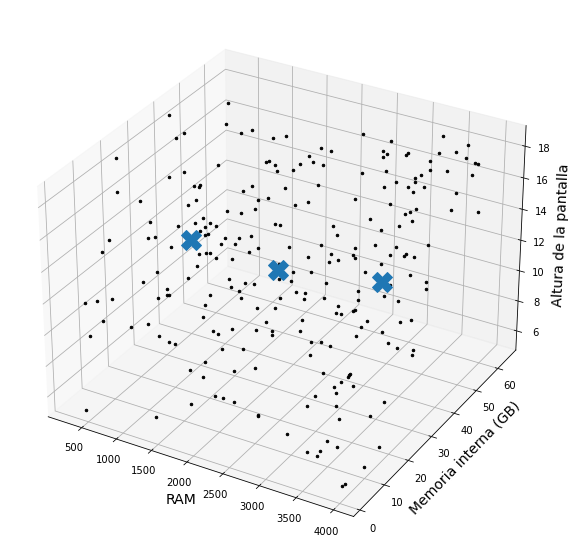

In [22]:
fig3d = plt.figure(figsize = (20, 10)).add_subplot(projection='3d')
fig3d.plot(X_b[:, 0], X_b[:,1], X_b[:,2],   'k.', markersize=5)
fig3d.plot(centroids[:, 0], centroids[:, 1], centroids[:, 2], 'X', markersize=20)
fig3d.set_xlabel('RAM', fontsize=14)
fig3d.set_ylabel('Memoria interna (GB)', fontsize=14)
fig3d.set_zlabel('Altura de la pantalla', fontsize=14)
plt.show()

# Resultados

Las tres clases quedan de la siguiente manera:

In [24]:
print("CLASE 1:")
print("Número de datos: " + str(len(X_b[y_pred==0])))
print("RAM: " + str(X_b[y_pred==0][:, 0].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==0][:, 1].mean()))
print("Altura pantalla: " + str(X_b[y_pred==0][:, 2].mean()))

CLASE 1:
Número de datos: 99
RAM: 3411.10101010101
Memoria interna (GB): 34.23232323232323
Altura pantalla: 12.858585858585858


In [25]:
print("CLASE 2:")
print("Número de datos: " + str(len(X_b[y_pred==1])))
print("RAM: " + str(X_b[y_pred==1][:, 0].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==1][:, 1].mean()))
print("Altura pantalla: " + str(X_b[y_pred==1][:, 2].mean()))

CLASE 2:
Número de datos: 72
RAM: 796.7916666666666
Memoria interna (GB): 32.59722222222222
Altura pantalla: 12.319444444444445


In [28]:
print("CLASE 3:")
print("Número de datos: " + str(len(X_b[y_pred==2])))
print("RAM: " + str(X_b[y_pred==2][:, 0].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==2][:, 1].mean()))
print("Altura pantalla: " + str(X_b[y_pred==2][:, 2].mean()))

CLASE 3:
Número de datos: 77
RAM: 2065.285714285714
Memoria interna (GB): 31.7012987012987
Altura pantalla: 12.155844155844155


Como podemos observar, las diferencias en memoria interna y en altura de la pantalla son bastante pequeñas entre las 3 clases, la propiedad que realmente se distingue entre ellas es la RAM, con la clase 1 teniendo la mayor cantidad, seguida de la clase 3 y al final queda la clase 2.

Por lo tanto, según el algoritmo K-Means los smartphones de gama alta serían los de la clase 1, la gama media la clase 3 y la gama baja la clase 2.

# Conclusión

Como has podido notar, distintas herramientas de Business Intelligence (en esta ocasión el algoritmo K-Means) pueden ser bastante útiles para determinar una decisión sobre un producto o un negocio.

Se pudo tomar una serie de datos de productos con sus características y clasificarlos mediante propiedades clave para facilitar una decisión de negocio que podría favorecer las ventas al reducir la elección de los clientes.

Sin embargo, es necesario resaltar que este proyecto tiene únicamente la finalidad de resaltar las ventajas de la clasificación en el Business Intelligence y la demostración del algoritmo K-Means, de ninguna manera se trata de un caso profesional y no debería de ser tratado como tal.

# Consideraciones

En un principio, había intentado utilizar todas las propiedades de los productos utilizando la base de datos entera; sin embargo, al analizar los resultados me di cuenta de que al tomar en cuenta las 20 características de los celulares era bastante complicado para el algoritmo generar clasificaciones relevantes para el análisis.

No obstante, puedes observar el algoritmo con todas las propiedades en el archivo Cellphones_K-Means de este repositorio.

Una recomendación importante para los algoritmos de clasificación es que a veces "menos es más".

# Referencias

<a href="https://matplotlib.org/">https://matplotlib.org/</a>

https://www.youtube.com/watch?v=VO6XEQIsCoM&ab_channel=TED

O'Reilly - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd edition, 2019)

https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv

Este proyecto fue realizado para una práctica por <a href="https://mx.linkedin.com/in/christian-cabral-peniche-089bbb1b8">Christian Cabral</a> para la materia de Inteligencia de Negocios impartida por <a href="https://www.linkedin.com/in/novelo-luis/">Luis Novelo</a> en la Universidad Modelo.